In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [58]:
# Realizamos la lectura de los datos que vamos a utilizar.

aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')

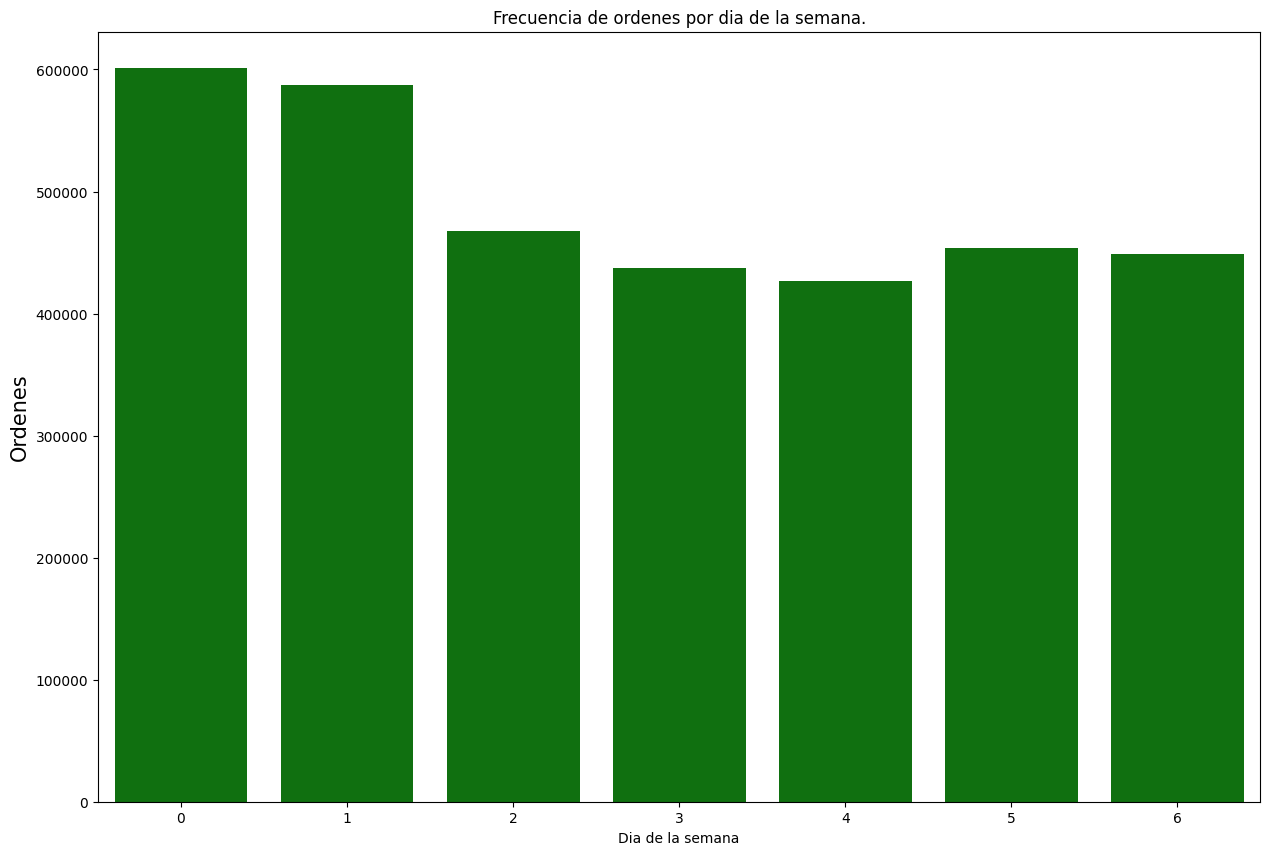

In [59]:
# El codigo de plt.figure nos ayuda a crear el tablero con un tamano de 15x10/
plt.figure(figsize=(15,10))
# En el caso de sns.countplot aqui nos ayuda que nuestra variable horizontal(x) sea el dia de la semana,
# el cual es una columna que tenemos dentro de orders.csv, conocida como order_dow, el color de 0.8 solo es para hacerla gris.
sns.countplot(x="order_dow", data=orders_df, color="Green")
# Aqui en labels unicamente le ponemos nombre a los valores de x/y,diciendo que 'y' son las ordenes y 'x' los dias de la semana. 
plt.ylabel('Ordenes', fontsize=15)
plt.xlabel('Dia de la semana')
# Establecemos el titulo y finalmente mostramos el grafico.
plt.title("Frecuencia de ordenes por dia de la semana.")
plt.show()

In [60]:
# Como podemos observar, en la grafica anterior nos muestra como la frecuencia se establece principalmente en Domingo y Lunes,
# los cuales son los primeros dias de la semana, si consideramos que 0 es Domingo y 1 y es Lunes.
# Podemos observar de igual forma que los otros dias no son tan frecuentes, ya que el Jueves es el dia mas bajo, seguido de 
# Miercoles y Viernes.

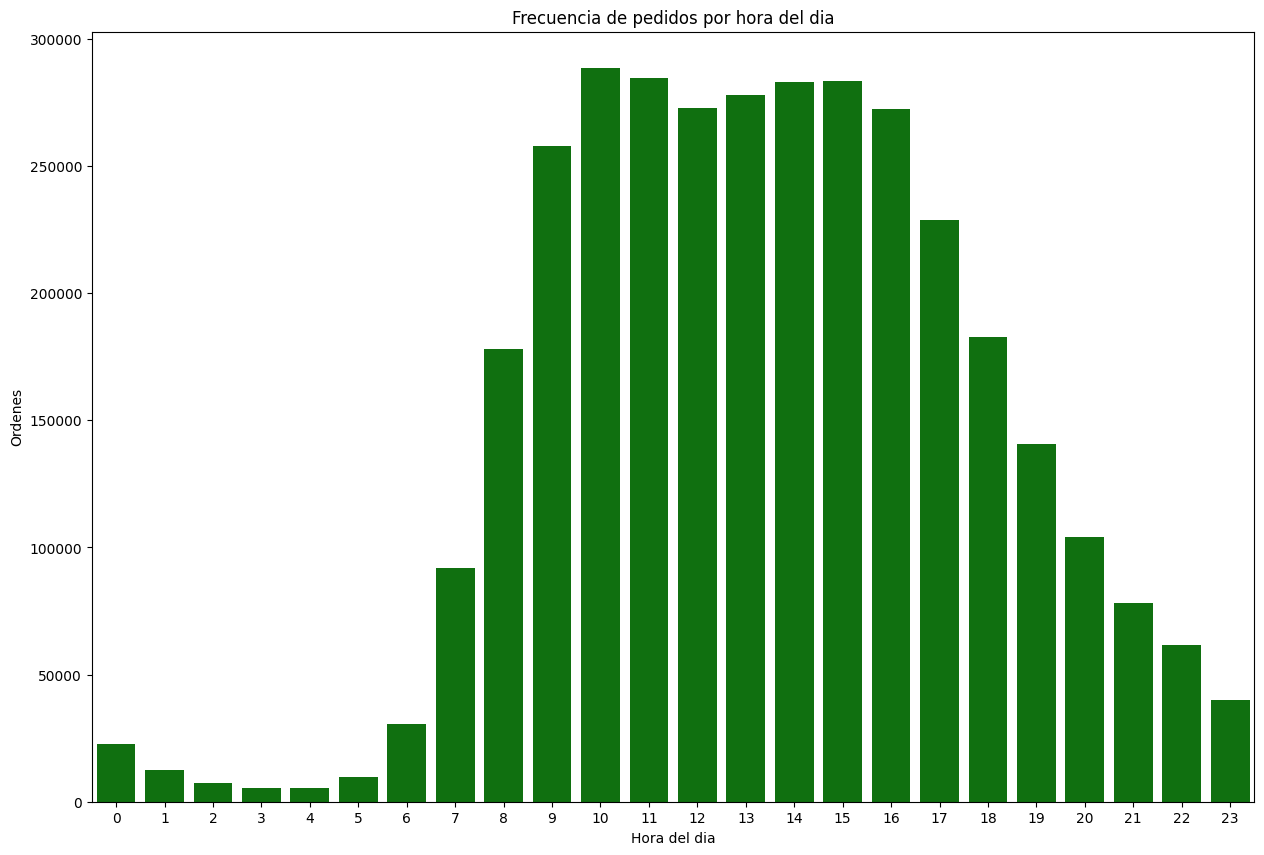

In [61]:
# Aqui en esta tabla nos ayudara a ver la frecuencia de ordenes que se generan por dia. 

plt.figure(figsize=(15,10))
sns.countplot(x="order_hour_of_day", data=orders_df, color="Green")
plt.ylabel('Ordenes')
plt.xlabel('Hora del dia')
plt.title("Frecuencia de pedidos por hora del dia")
plt.show()

In [62]:
# En este grafico podemos observar que dias es mas frecuentes que se realicen los pedidos independiente al dia.
# Podemos obsvervar que las horas mas concurridas son las de la 9am, 10am, 2pm y 3pm. 
# Mientras que las horas menos concurridas son las de las 2am, 3am, 4am y 5am

In [63]:
# Para poder seguir realizando mas analisis dentro de los distintos datasets, es importante saber relacionar los dataframes unos con otros.
# En este caso, nuestro data frame de products_prior tiene algo en comun con productos, que es el Product_id, el cual nos permite saber el identificador de los productos.
# Con ayuda de el .merge de pandas, generamos una combinacion de ambos dataframes en uno solo, manteniendo todas las columnas.
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

# Como observamos, ya tenemos la combinacion del order id con su producto, pasillo y departamento, aun que aun no tenemos los nombres de ellos. Como ya cuento con esta nueva id que antes
# no tenia, podemos juntarlo con los otros dataframes, en este caso, podriamos intentar con el pasillo o el aisle_df.
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
5,2,17794,6,1,Carrots,83,4
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,Classic Blend Cole Slaw,123,4
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16


In [64]:
# Repetimos exactamente lo mismo que hicimos, sin embargo, cambiamos el dataframe al de aisle_df
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')

#Y ahora como vemos, tenemos el nombre de el pasillo dependiendo del aisle_id.
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients
5,2,17794,6,1,Carrots,83,4,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt


In [65]:
# Repetimos nuevamente pero esta vez para conseguir el nombre de los departamentos.
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')

# Finalmente tenemos la combinacion de los productos, nombres, pasillos y departamentos.
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [66]:
# Ya que tenemos todo en un dataframe gigante, podemos contar cuantas veces se repite el nombre en el dataframe, para asi poder obtener cuantas veces con ayuda del value_counts
# se ha comprado un producto en especifico. 
ordenPorProducto = order_products_prior_df['product_name'].value_counts().head(20)
ordenPorProducto.head(10)

#Y podemos empezar a graficar para verificar esta informacion.

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

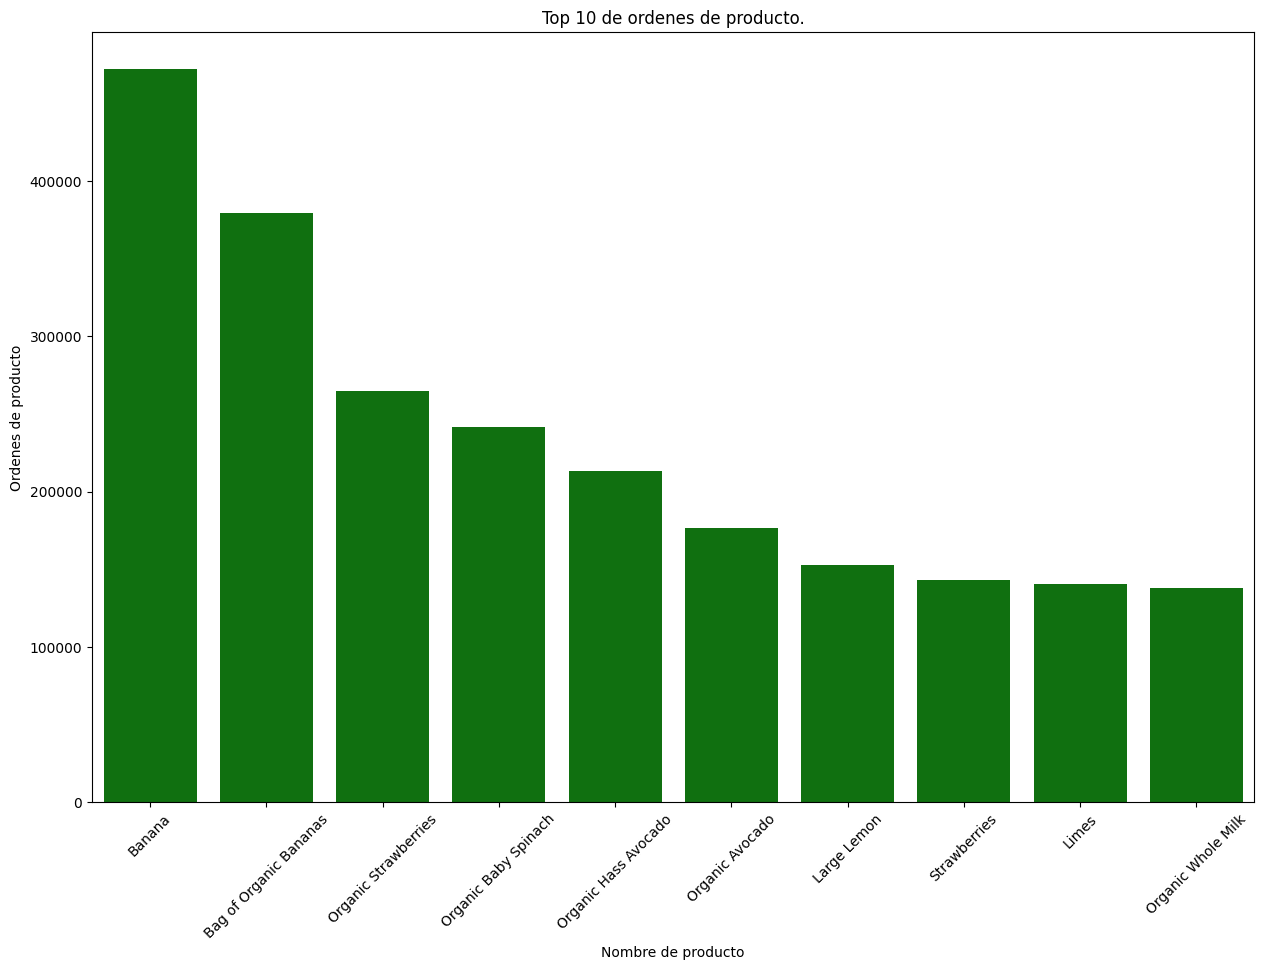

In [67]:
# Primeramente creamos una figura con las medidas que usamos en los anteriores.
plt.figure(figsize=(15, 10))

# Con ayuda de la libreria seaborns, establecemos el valor de x que buscamos, en este caso el nombre del producto. Con ayuda del data localizamos de donde sacaremos la informacion,
# El cual es el dataframe que previamente formamos con los demas. El order nos permite ordenar los valores de name contandolos, y estableciendo unicamente los top 10 para nuestra tabla.
sns.countplot(x='product_name', data=order_products_prior_df, order=order_products_prior_df['product_name'].value_counts().head(10).index, color="Green")

# Aqui unicamente establecemos que nombres damos a las label para poder dar a ententender la informacion, en el caso de los xticks, ya que la informacion no cabia de maneria horizontal, 
# Lo rotamos un poco para que se pueda visualizar correctamente.
plt.title('Top 10 de ordenes de producto.')
plt.xlabel('Nombre de producto')
plt.ylabel('Ordenes de producto')
plt.xticks(rotation=45)

plt.show()


In [68]:
# Para conseguir los datos de los productos mas vendidos para graficarlos, necesite tambien unir el excel de Order_df, para poder observar la hora y dia de cada uno de los pedidos
# Ya que tambien quiero resolver la pregunta que me solicitan de a que hora se venden los productos y en que dias. 
order_products_prior_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,prior,16,5,17,12.0


In [69]:
# Queria representar en una tabla de igual forma los productos con sus respectivas horas sin embargo, me tomaba mucho tiempo o de plano mi ordenador no daba para mas.
# Asi que lo cambie mejor por una tabla que represente los top 10 productos que vemos en la tabla anterior pero las horas en las que mas se venden en los dias de la semana

# Primero, tenia que conseguir sacar del dataframe que teniamos con todos los datos los top 10 productos que vimos anteriormente.
# para esto, creamos la variable topDiez, la cual va a guardar los primeros 10 productos en base a su cantidad de compras, tal como hicimos previamente para el countplot.
topDiez = order_products_prior_df['product_name'].value_counts().head(10).index

# Creamos un dataframe con el top diez productos pero unicamente si estan dentro de la variable que guardamos anteriormente, es decir, solo guardaremos las columnas de Banana,
# Bag of organic bananas, y los demas productos que vimos anteriormente que estaba en el top 10.
topDiez_df = order_products_prior_df.loc[order_products_prior_df['product_name'].isin(topDiez)]
topDiez_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
12,3,21903,4,1,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,205970,prior,16,5,17,12.0
30,5,13176,1,1,Bag of Organic Bananas,24,4,fresh fruits,produce,156122,prior,42,6,16,9.0
51,5,47209,22,0,Organic Hass Avocado,24,4,fresh fruits,produce,156122,prior,42,6,16,9.0
77,10,24852,1,1,Banana,24,4,fresh fruits,produce,135442,prior,4,6,8,8.0
80,10,47766,4,1,Organic Avocado,24,4,fresh fruits,produce,135442,prior,4,6,8,8.0
83,10,21137,7,1,Organic Strawberries,24,4,fresh fruits,produce,135442,prior,4,6,8,8.0
126,14,27845,2,1,Organic Whole Milk,84,16,milk,dairy eggs,18194,prior,49,3,15,3.0
170,18,47766,27,1,Organic Avocado,24,4,fresh fruits,produce,118860,prior,3,4,20,6.0
180,20,24852,6,0,Banana,24,4,fresh fruits,produce,182912,prior,1,6,17,NaN
190,22,24852,3,1,Banana,24,4,fresh fruits,produce,30822,prior,25,1,8,12.0


In [70]:
# Si queremos limpiar la informacion en este dataframe para unicamente observar las columnas relevantes, podemos hacerlo.
topDiez_df = topDiez_df.drop(columns=['add_to_cart_order', 'reordered', 'aisle_id', 'department_id', 'aisle', 'user_id', 'eval_set', 'order_number', 'days_since_prior_order', 'department', 'order_id'])
topDiez_df.head(25)

,product_id,product_name,order_dow,order_hour_of_day
12,21903,Organic Baby Spinach,5,17
30,13176,Bag of Organic Bananas,6,16
51,47209,Organic Hass Avocado,6,16
77,24852,Banana,6,8
80,47766,Organic Avocado,6,8
83,21137,Organic Strawberries,6,8
126,27845,Organic Whole Milk,3,15
170,47766,Organic Avocado,4,20
180,24852,Banana,6,17
190,24852,Banana,1,8


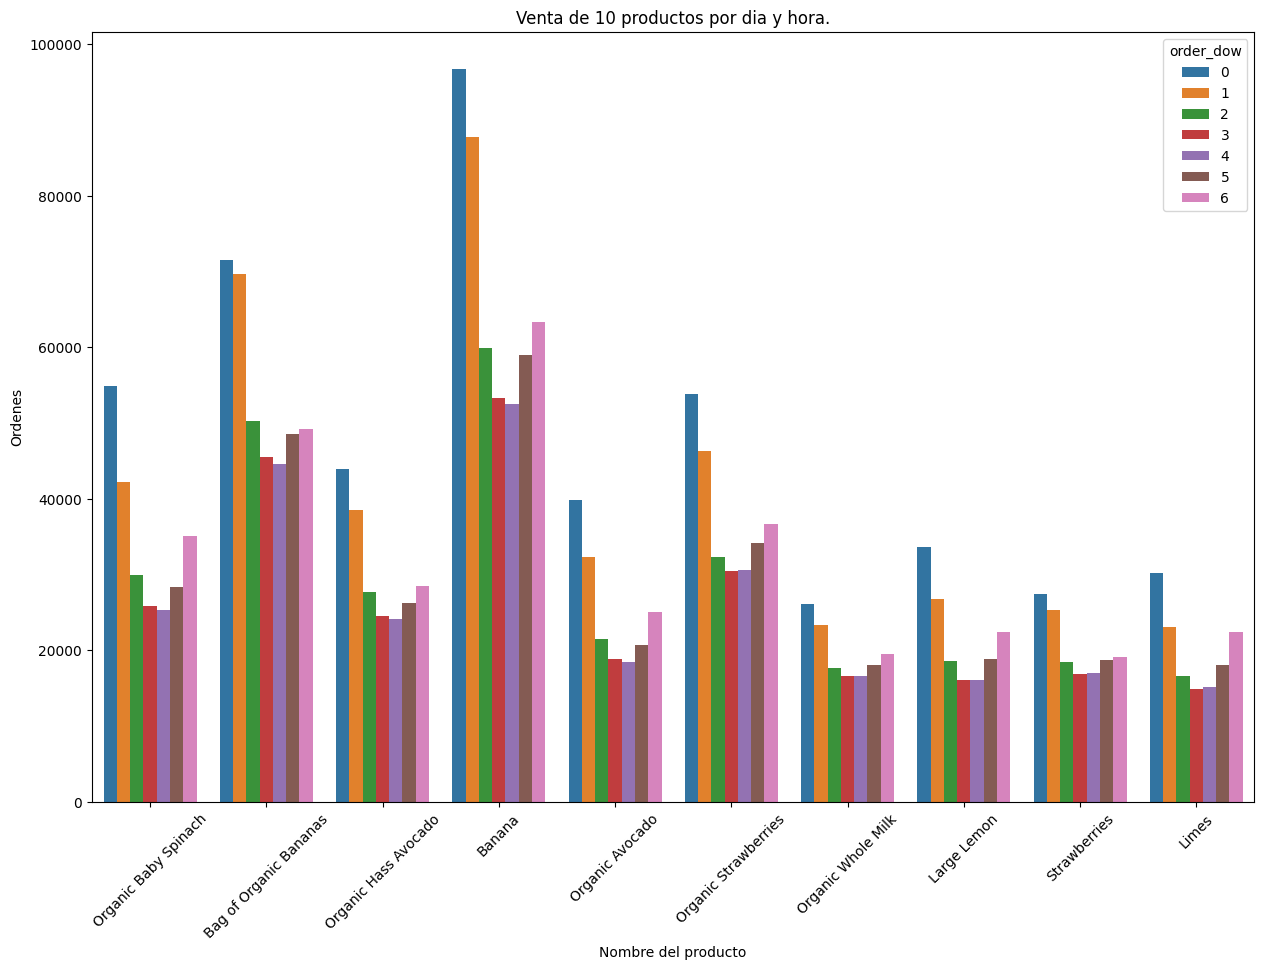

In [71]:
#Aqui ya seleccionamos el tamano de la figura, que es igual que los anteriores. 
plt.figure(figsize=(15, 10))
# Aqui seleccionamos que sera un countplot, con el valor de x el nombre del producto, los valores de hue son los dias de la semana y la informacion la obtenemos del dataframe que limpiamos.
sns.countplot(x='product_name', hue='order_dow', data=topDiez_df)
# Damos titulo a los valores de X/Y y le damos titulo a la tabla.
plt.xlabel('Nombre del producto')
plt.ylabel('Ordenes')
plt.title('Venta de 10 productos por dia y hora.')
plt.xticks(rotation=45)
plt.show()

In [72]:
# De igual forma podemos ver cuales son los pasillos mas transitados de donde mas se realizan compras.
ordenPorPasillo = order_products_prior_df['aisle'].value_counts().head(20)
ordenPorPasillo.head(10)

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

In [73]:
# Y de ultimo, los departamentos que mas generan compras en general.
ordenPorDepartamento = order_products_prior_df['department'].value_counts().head(20)
ordenPorDepartamento.head(10)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
Name: department, dtype: int64